In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib notebook

Matplotlib is building the font cache using fc-list. This may take a moment.


In [94]:
dfs_full = pd.read_csv('/Users/azadehkeivani/Desktop/DataScience/NYC-HS/2019_DOE_High_School_Directory.csv')

In [95]:
dfs_full.head(5)

,dbn,school_name,boro,overview_paragraph,school_10th_seats,academicopportunities1,academicopportunities2,academicopportunities3,academicopportunities4,academicopportunities5,...,state_code,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,16K498,Brooklyn High School for Law and Technology,K,The mission of Brooklyn High School for Law an...,Y,iLearnNYC: Program for expanded online coursew...,Access to Law and Technology Programs: Youth C...,"Computer Programming, iCareers, Online courses...","Multicultural Literature, Conflict Resolution/...",NaN,...,NY,BROOKLYN,40.688831,-73.920906,3,41,375,3039676.0,3.014820e+09,Stuyvesant Heights ...
1,17K524,International High School at Prospect Heights,K,We are a small school that works in teams to p...,Y,"We are a Performance-Based Assessment school, ...","Safe, supportive, and nurturing environment wh...",We are a Computer Science for All school. Thro...,All students are matched to an internship in t...,"Afterschool programs include: Peer Tutoring, A...",...,NY,BROOKLYN,40.670349,-73.961695,9,35,213,3029686.0,3.011870e+09,Crown Heights South ...
2,02M531,Repertory Company High School for Theatre Arts,M,We offer a college-preparatory program and New...,Y,iLearnNYC: Program for expanded online coursew...,"Advisory, Acting, Playwriting, Stagecraft, Mus...","National Honor Society, yearly grade-level res...",Learning Through Expanded Arts Playwriting Pro...,"Roundabout Theatre Company (Playwriting, IATSE...",...,NY,MANHATTAN,40.755843,-73.984382,5,4,119,1022615.0,1.009960e+09,Midtown-Midtown South ...
3,05M670,Thurgood Marshall Academy for Learning and Soc...,M,Thurgood Marshall Academy is an academically r...,Y,We offer a Regents curriculum designed to grad...,"Enrichment: Early College High School Program,...",College and Career Readiness: On-site College ...,Community Service and Internship: Abyssinian D...,"Partnerships: Columbia University, Northside C...",...,NY,MANHATTAN,40.815509,-73.944202,10,9,228,1058843.0,1.019400e+09,Central Harlem North-Polo Grounds ...
4,15K423,Brooklyn Frontiers High School,K,Brooklyn Frontiers High School serves entering...,NaN,Partnership with Good Shepherd Services: coach...,"Small classes, many co-taught by two teachers","Many opportunities for tutoring and support, b...",Paid Learning to Work Internships,NaN,...,NY,BROOKLYN,40.690145,-73.989132,2,33,43,3000533.0,3.001690e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...


In [96]:
len(dfs_full)

427

In [97]:
college_rate = dfs_full['college_career_rate'][dfs_full['college_career_rate'].isna()==False]

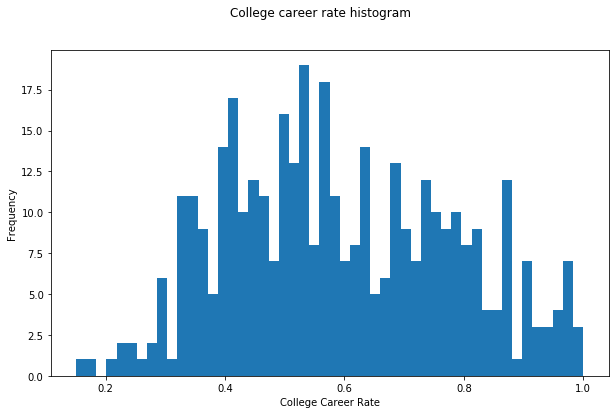

In [118]:
plt.hist(college_rate, 50)
plt.xlabel('College Career Rate')
plt.ylabel('Frequency')
plt.suptitle('College career rate histogram')
plt.show()
#At the end of the school year, the percent of students who graduated from high school four years after they entered 9th grade and then enrolled in college, a vocational program, or a public service program within six months of graduation

In [99]:
len(college_rate)

384

In [100]:
np.mean(college_rate)

0.5928385416666667

In [101]:
ext_act = dfs_full['extracurricular_activities'][dfs_full['college_career_rate'].isna()==False].fillna('nothing')

In [102]:
ext_act

0                                                nothing
1                                                nothing
2      A Cappella Chorus, Advanced Dance/Chorus/Tech/...
3      Cheerleading, Dance, Fashion, National Honor S...
6      3D Modeling and Robotics, Body Love, Bollywood...
                             ...                        
422    Algebra for All, Black Latino Alliance Tacklin...
423    Gateway to Higher Education International Club...
424    AVID Elective Class, AVID Tutoring, Circle Adv...
425    National Honor Society, Student Government, Fi...
426    Art, Astronomy, Band, Cheerleading, Chorus, Cr...
Name: extracurricular_activities, Length: 384, dtype: object

In [103]:
len(ext_act)

384

In [110]:
ext_act_split = ext_act.str.split(',').reset_index(drop=True)

In [111]:
ext_act_split

0                                              [nothing]
1                                              [nothing]
2      [A Cappella Chorus,  Advanced Dance/Chorus/Tec...
3      [Cheerleading,  Dance,  Fashion,  National Hon...
4      [3D Modeling and Robotics,  Body Love,  Bollyw...
                             ...                        
379    [Algebra for All,  Black Latino Alliance Tackl...
380    [Gateway to Higher Education International Clu...
381    [AVID Elective Class,  AVID Tutoring,  Circle ...
382    [National Honor Society,  Student Government, ...
383    [Art,  Astronomy,  Band,  Cheerleading,  Choru...
Name: extracurricular_activities, Length: 384, dtype: object

In [112]:
ext_act_num=[]
for i in range(len(ext_act_split)):
    if ext_act_split[i]==['nothing']:
        ext_act_num.append(0)
    else:
        ext_act_num.append(len(ext_act_split[i]))
print(ext_act_num)

[0, 0, 22, 11, 31, 24, 12, 0, 11, 15, 26, 14, 11, 18, 18, 19, 11, 17, 26, 38, 0, 22, 23, 0, 26, 24, 25, 31, 0, 24, 21, 8, 20, 13, 24, 31, 38, 13, 32, 10, 22, 14, 21, 23, 25, 11, 20, 20, 8, 46, 12, 30, 9, 0, 7, 29, 28, 20, 14, 16, 8, 0, 17, 17, 22, 23, 7, 12, 3, 15, 28, 27, 26, 16, 33, 17, 18, 17, 8, 13, 19, 15, 16, 1, 19, 14, 36, 16, 12, 12, 19, 12, 11, 22, 30, 37, 12, 16, 15, 18, 13, 25, 17, 21, 14, 12, 14, 21, 17, 30, 17, 13, 22, 24, 15, 31, 26, 20, 10, 15, 18, 20, 24, 14, 36, 23, 9, 27, 11, 13, 0, 25, 0, 24, 18, 29, 32, 19, 10, 18, 15, 24, 11, 0, 16, 20, 1, 15, 0, 12, 28, 18, 9, 27, 25, 12, 13, 16, 0, 31, 0, 12, 26, 12, 18, 11, 8, 24, 8, 19, 1, 21, 22, 16, 23, 27, 14, 8, 24, 39, 18, 19, 24, 23, 21, 28, 18, 6, 16, 32, 31, 0, 13, 21, 10, 7, 11, 24, 21, 24, 33, 38, 22, 18, 16, 50, 27, 12, 15, 33, 12, 24, 23, 15, 23, 5, 33, 30, 32, 20, 29, 24, 15, 22, 11, 22, 14, 9, 21, 0, 15, 14, 29, 41, 16, 12, 26, 22, 15, 20, 11, 14, 25, 16, 0, 17, 38, 23, 8, 12, 13, 14, 11, 10, 37, 20, 17, 14, 12, 2

In [113]:
len(ext_act_num)

384

Populating the interactive namespace from numpy and matplotlib


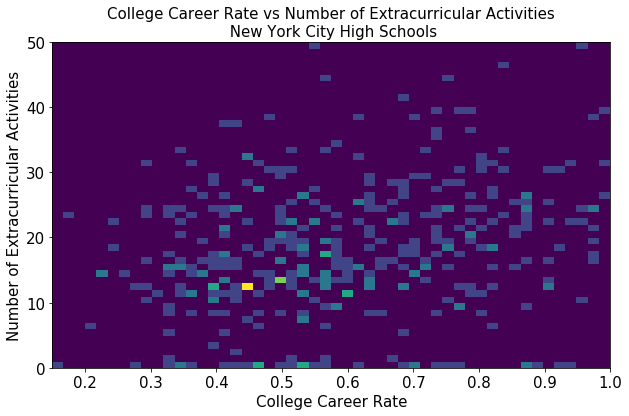

In [117]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)

fig, ax = plt.subplots()

#ax.scatter(college_rate,ext_act_num, marker='*')
ax.hist2d(college_rate,ext_act_num,bins=50)

ax.set_xlabel('College Career Rate',fontsize=15)
ax.set_ylabel('Number of Extracurricular Activities',fontsize=15)
ax.set_title('College Career Rate vs Number of Extracurricular Activities\n New York City High Schools',fontsize=15)

ax.tick_params(axis = 'both', labelsize = 15)